# Data Visualization Exercise using Electronic Sales dataset

## Imported Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Create a dataframe, sales, from a csv file, all_sales.

In [67]:
sales = pd.read_csv("all_sales.csv")

In [68]:
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Check the total number of blank rows

In [69]:
sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## Remove all nulls/blanks using the dropna() method.

In [70]:
sales = sales.dropna()
sales.info()
sales.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [71]:
sales.head()

#there is no month column BUT the Order Date column contains a month detail which could be extracted.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [72]:
#Extract MONTH values

sales["Month"]=sales["Order Date"].str[0:2] #EXTRACT MONTH
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


## Convert data type of Month to an integer

In [73]:
#Now extract MONTH

#  sales["Month"]=sales["Month"].astype("int32")  #<-- this code will result to ValueError because of "Or"


# Value Error with value 'Or'

## Create Or_dump dataframe to check the "Or's" in the Month col

In [74]:
Or_dump = sales[sales["Month"]=="Or"]
Or_dump.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


## Remove Or's from Month col

In [75]:
sales = sales[sales["Month"]!="Or"]

## Create Or_dump dataframe to check the "Or's" in the Month Column

In [76]:
Or_dump = sales[sales["Month"]=="Or"]
Or_dump.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


## Convert data type of Month Column from the object to integer

In [77]:
sales["Month"]=sales["Month"].astype("int32")

In [78]:
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## But where is Sales column? This can be derived from Qty Ordered * Price Each columns.
## First, check data type of each column

## Convert Quantity Ordered and Price Each columns to the correct data type

In [79]:
sales["Quantity Ordered"] = pd.to_numeric(sales["Quantity Ordered"])
sales["Price Each"] = pd.to_numeric(sales["Price Each"])
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [80]:
sales["Sales"] = sales["Quantity Ordered"] * sales["Price Each"]
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Questions:

### Q1. Which month had the highest sale? What is the monthly sales trend?


# Plotting the data

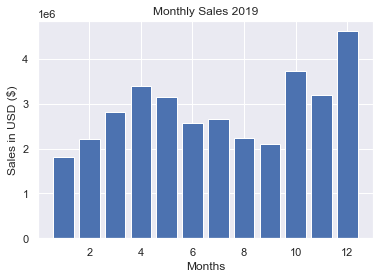

In [81]:
sns.set() #This is seaborn setting, it can be removed to revert to default matplotlib

months = range(1,13)
plt.bar(months,sales.groupby(["Month"]).sum()["Sales"])

plt.title("Monthly Sales 2019")
plt.xlabel("Months")
plt.ylabel("Sales in USD ($)")
plt.show()

#notice the 1e6 in the graph, we can remove this by dividing the Sales values to 1 million

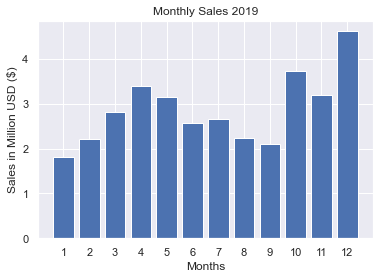

In [82]:
sns.set()

months = range(1,13)
plt.bar(months,sales.groupby(["Month"]).sum()["Sales"]/1000000)

plt.title("Monthly Sales 2019")
plt.xlabel("Months")
plt.ylabel("Sales in Million USD ($)")

plt.xticks(months)
plt.show()

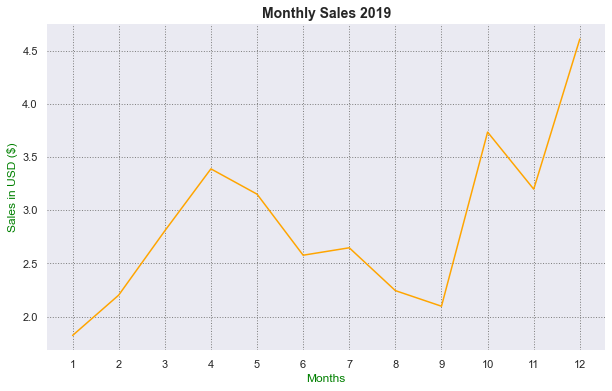

In [83]:
sns.set()

# Line graph can also be used
fig = plt.figure(figsize=(10,6))

months = range(1,13)
plt.plot(months,sales.groupby(["Month"]).sum()["Sales"]/1000000, color="orange")

plt.title("Monthly Sales 2019", fontsize=14, fontweight="bold")
plt.xlabel("Months", fontsize=12, color="green")
plt.ylabel("Sales in USD ($)", fontsize=12, color="green")

plt.xticks(months)

#add grid
plt.grid(True, color="grey", linestyle=":")

#remove spines or border of graph
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

### 2. Which product sold the most? How are the other products doing?

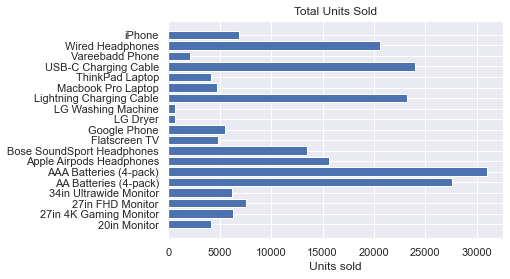

In [84]:
product_group = sales.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]
plt.barh(products, quantity_ordered)

plt.title("Total Units Sold", fontsize=12)
plt.ylabel("")
plt.xlabel("Units sold")
plt.yticks(products)
plt.show()

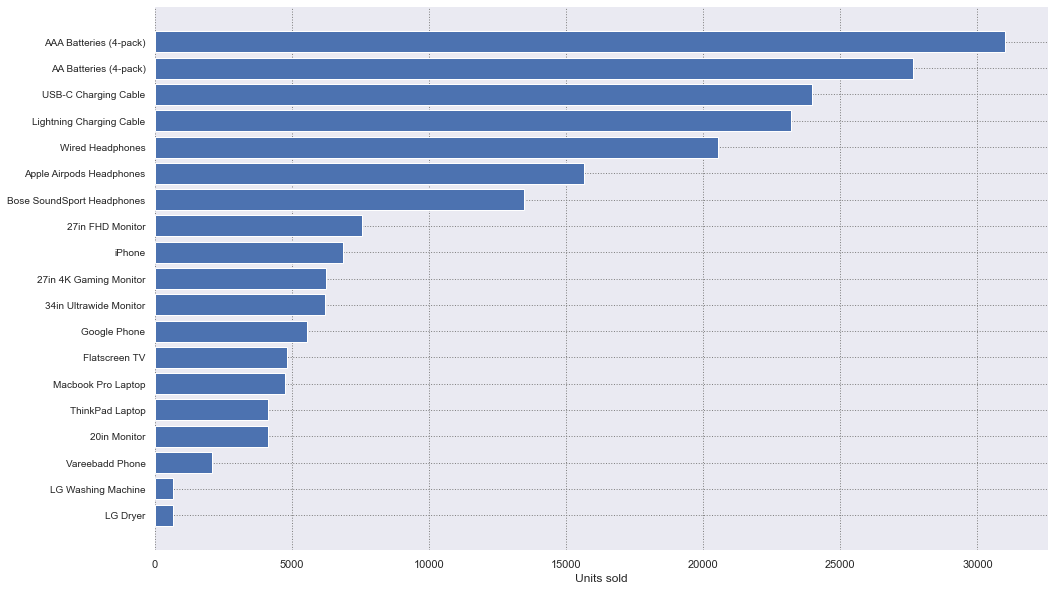

In [85]:
# Improving the plot

fig = plt.figure(figsize =(16,10))

product_group = sales.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

sort_sum = quantity_ordered.sort_values(ascending=True)
sort_sum = pd.DataFrame(sort_sum)
sort_sum = sort_sum.reset_index()

product = sort_sum["Product"]
quantity = sort_sum["Quantity Ordered"]

plt.barh(product,quantity)

plt.xlabel("Units sold")
plt.yticks(product, size=10)

plt.grid(True, color="grey", linestyle=":")

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [86]:
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,4129,451068.99,29336,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00


# isin() method

In [87]:
hphone = sort_sum[sort_sum["Product"].isin(["Apple Airpods Headphones","Bose SoundSport Headphones","Wired Headphones"])]
hphone

,Product,Quantity Ordered
12,Bose SoundSport Headphones,13457
13,Apple Airpods Headphones,15661
14,Wired Headphones,20557


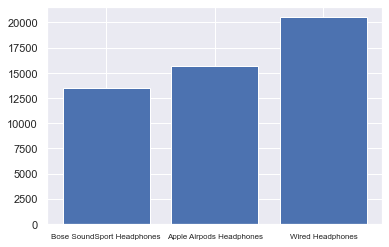

In [88]:
h_product = hphone["Product"]
h_quantity = hphone["Quantity Ordered"]

plt.bar(h_product, h_quantity)
plt.xticks(h_product, size=8)

plt.show()

In [89]:
phone = sort_sum[sort_sum["Product"].isin(["Google Phone","Vareebadd Phone","iPhone"])]
phone

,Product,Quantity Ordered
2,Vareebadd Phone,2068
7,Google Phone,5532
10,iPhone,6849


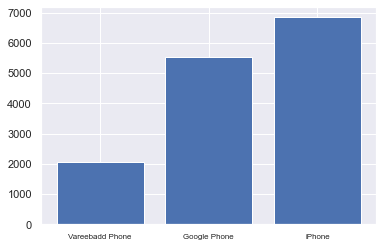

In [90]:
p_product = phone["Product"]
p_quantity = phone["Quantity Ordered"]

plt.bar(p_product, p_quantity)
plt.xticks(p_product, size=8)

plt.show()

# Subplot method  .subplot(no. of rows, no. of columns, index of current plot)

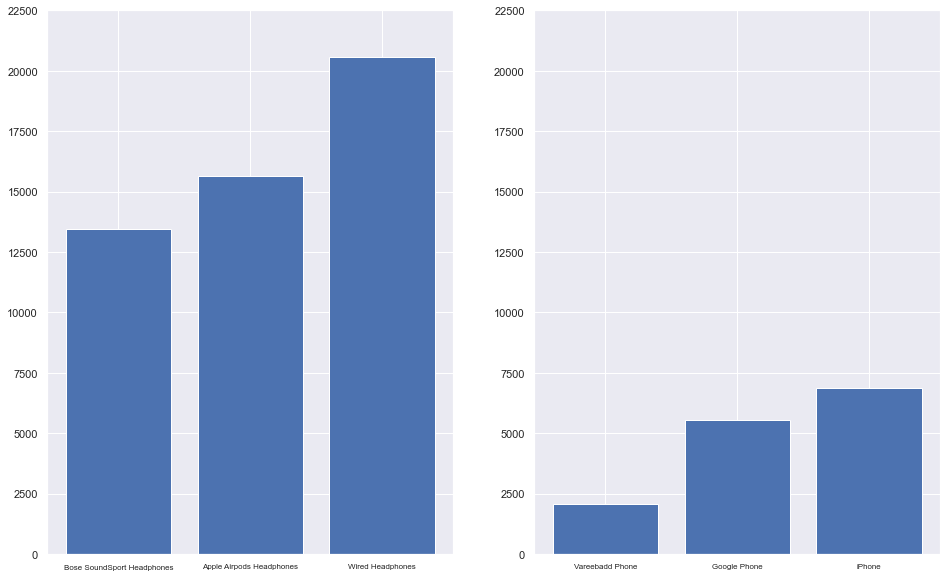

In [91]:
#CHANGE SCALE OF YLIM

fig = plt.figure(figsize = (16,10))

h_product = hphone["Product"]
h_quantity = hphone["Quantity Ordered"]
#plot 1
plt.subplot(1,2,1)
plt.bar(h_product, h_quantity)
plt.xticks(h_product, size=8)
plt.ylim(0,22500)

#plot 2

plt.subplot(1,2,2)
plt.bar(p_product, p_quantity)
plt.xticks(p_product, size=8)
plt.ylim(0,22500)

plt.show()

# Switch to barh

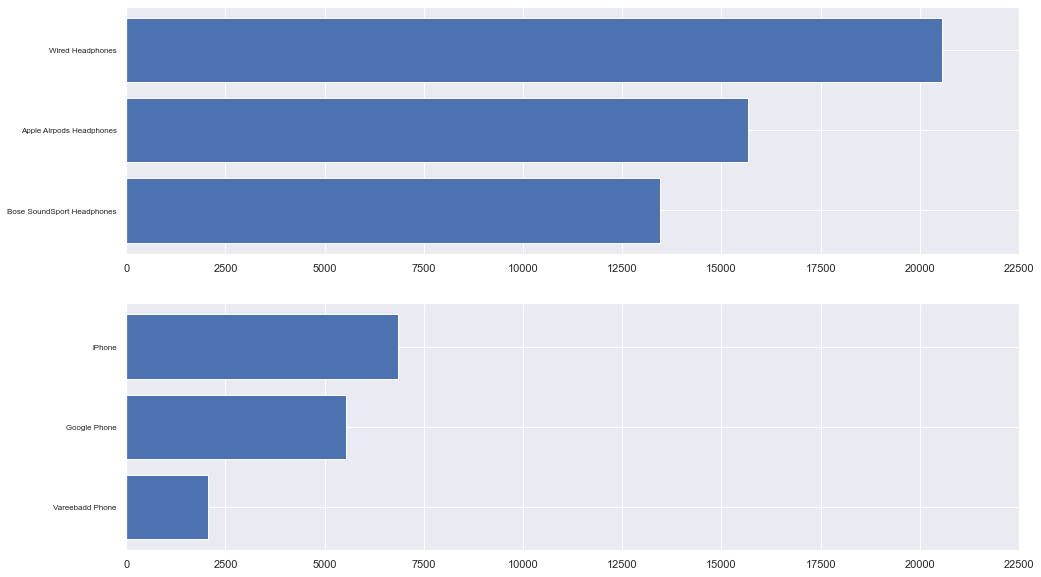

In [92]:
fig = plt.figure(figsize = (16,10))

h_product = hphone["Product"]
h_quantity = hphone["Quantity Ordered"]

#plot 1
plt.subplot(2,1,1)
plt.barh(h_product, h_quantity)
plt.yticks(h_product, size=8)
plt.xlim(0,22500)

#plot 2

plt.subplot(2,1,2)
plt.barh(p_product, p_quantity)
plt.yticks(p_product, size=8)
plt.xlim(0,22500)

plt.show()

# Subplots() method

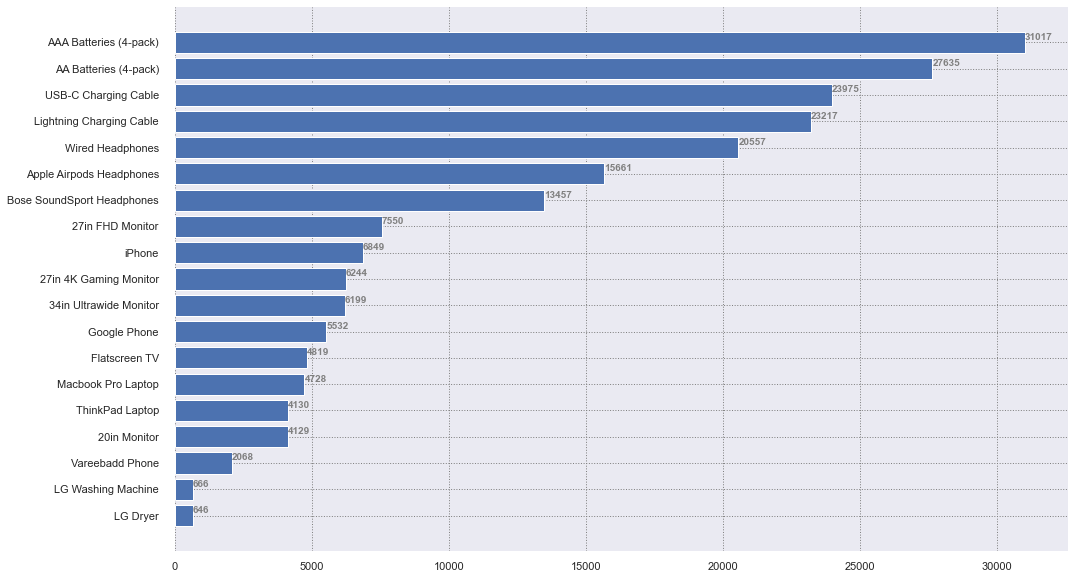

In [93]:
# Improving the plot

fig, ax = plt.subplots(figsize =(16,10))
#fig represents the drawing window
# ax is the coordinate system

product_group = sales.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

sort_sum = quantity_ordered.sort_values(ascending=True)
sort_sum = pd.DataFrame(sort_sum)
sort_sum = sort_sum.reset_index()

product = sort_sum["Product"]
quantity = sort_sum["Quantity Ordered"]

#instead of plt, call attribute of ax

ax.barh(product,quantity)

# Add y values to the bars

for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
           str(round((i.get_width()), 2)), 
           fontsize = 10, fontweight="bold",
           color="grey")
    
# Remove x and y ticks
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")

# Add x, y gridlines

ax.grid(b=True, color="grey", linestyle=":")

# Add padding/spaces between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

#Remove axes spines
for s in["top", "bottom", "left", "right"]:
    ax.spines[s].set_visible(False)

plt.show()